In [8]:
%pip install scikit-learn pandas seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import sklearn 
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [70]:
data = pd.read_csv("loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [71]:
from sklearn.preprocessing import OneHotEncoder

education_ohe = OneHotEncoder(handle_unknown='ignore')
self_employed_ohe = OneHotEncoder(handle_unknown='ignore')
loan_status_ohe = OneHotEncoder(handle_unknown='ignore')


education_dataframe = pd.DataFrame(data=education_ohe.fit_transform(data[' education'].to_numpy().reshape(-1, 1)).A, columns=education_ohe.get_feature_names_out())
self_employed_dataframe = pd.DataFrame(data=self_employed_ohe.fit_transform(data[' self_employed'].to_numpy().reshape(-1, 1)).A, columns=self_employed_ohe.get_feature_names_out())
loan_status_dataframe = pd.DataFrame(data=loan_status_ohe.fit_transform(data[' loan_status'].to_numpy().reshape(-1, 1)).A, columns=loan_status_ohe.get_feature_names_out())

data = pd.concat([data,education_dataframe,self_employed_dataframe,loan_status_dataframe],axis=1).drop(columns=[" education"," self_employed"," loan_status","loan_id"])
data.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,x0_ Graduate,x0_ Not Graduate,x0_ No,x0_ Yes,x0_ Approved,x0_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0,0.0,1.0,0.0,1.0,0.0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0,1.0,0.0,1.0,0.0,1.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0,0.0,1.0,0.0,0.0,1.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0,0.0,1.0,0.0,0.0,1.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0,1.0,0.0,1.0,0.0,1.0


<Axes: >

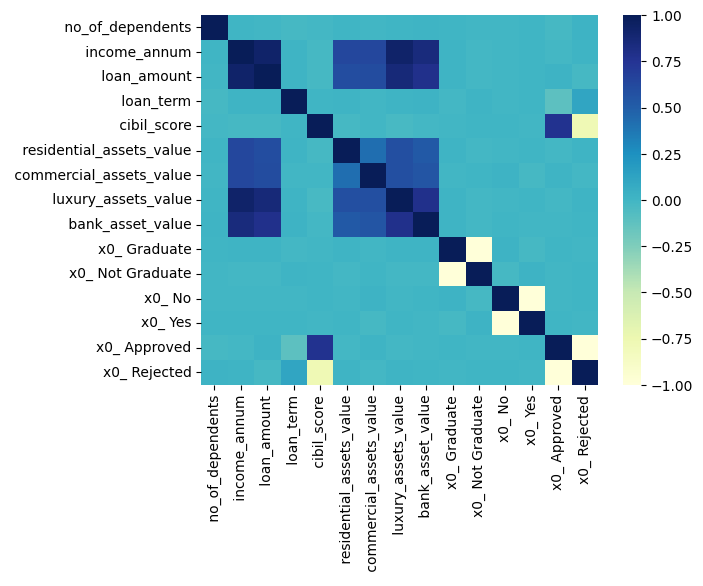

In [56]:
sns.heatmap(data.corr(), cmap="YlGnBu") 

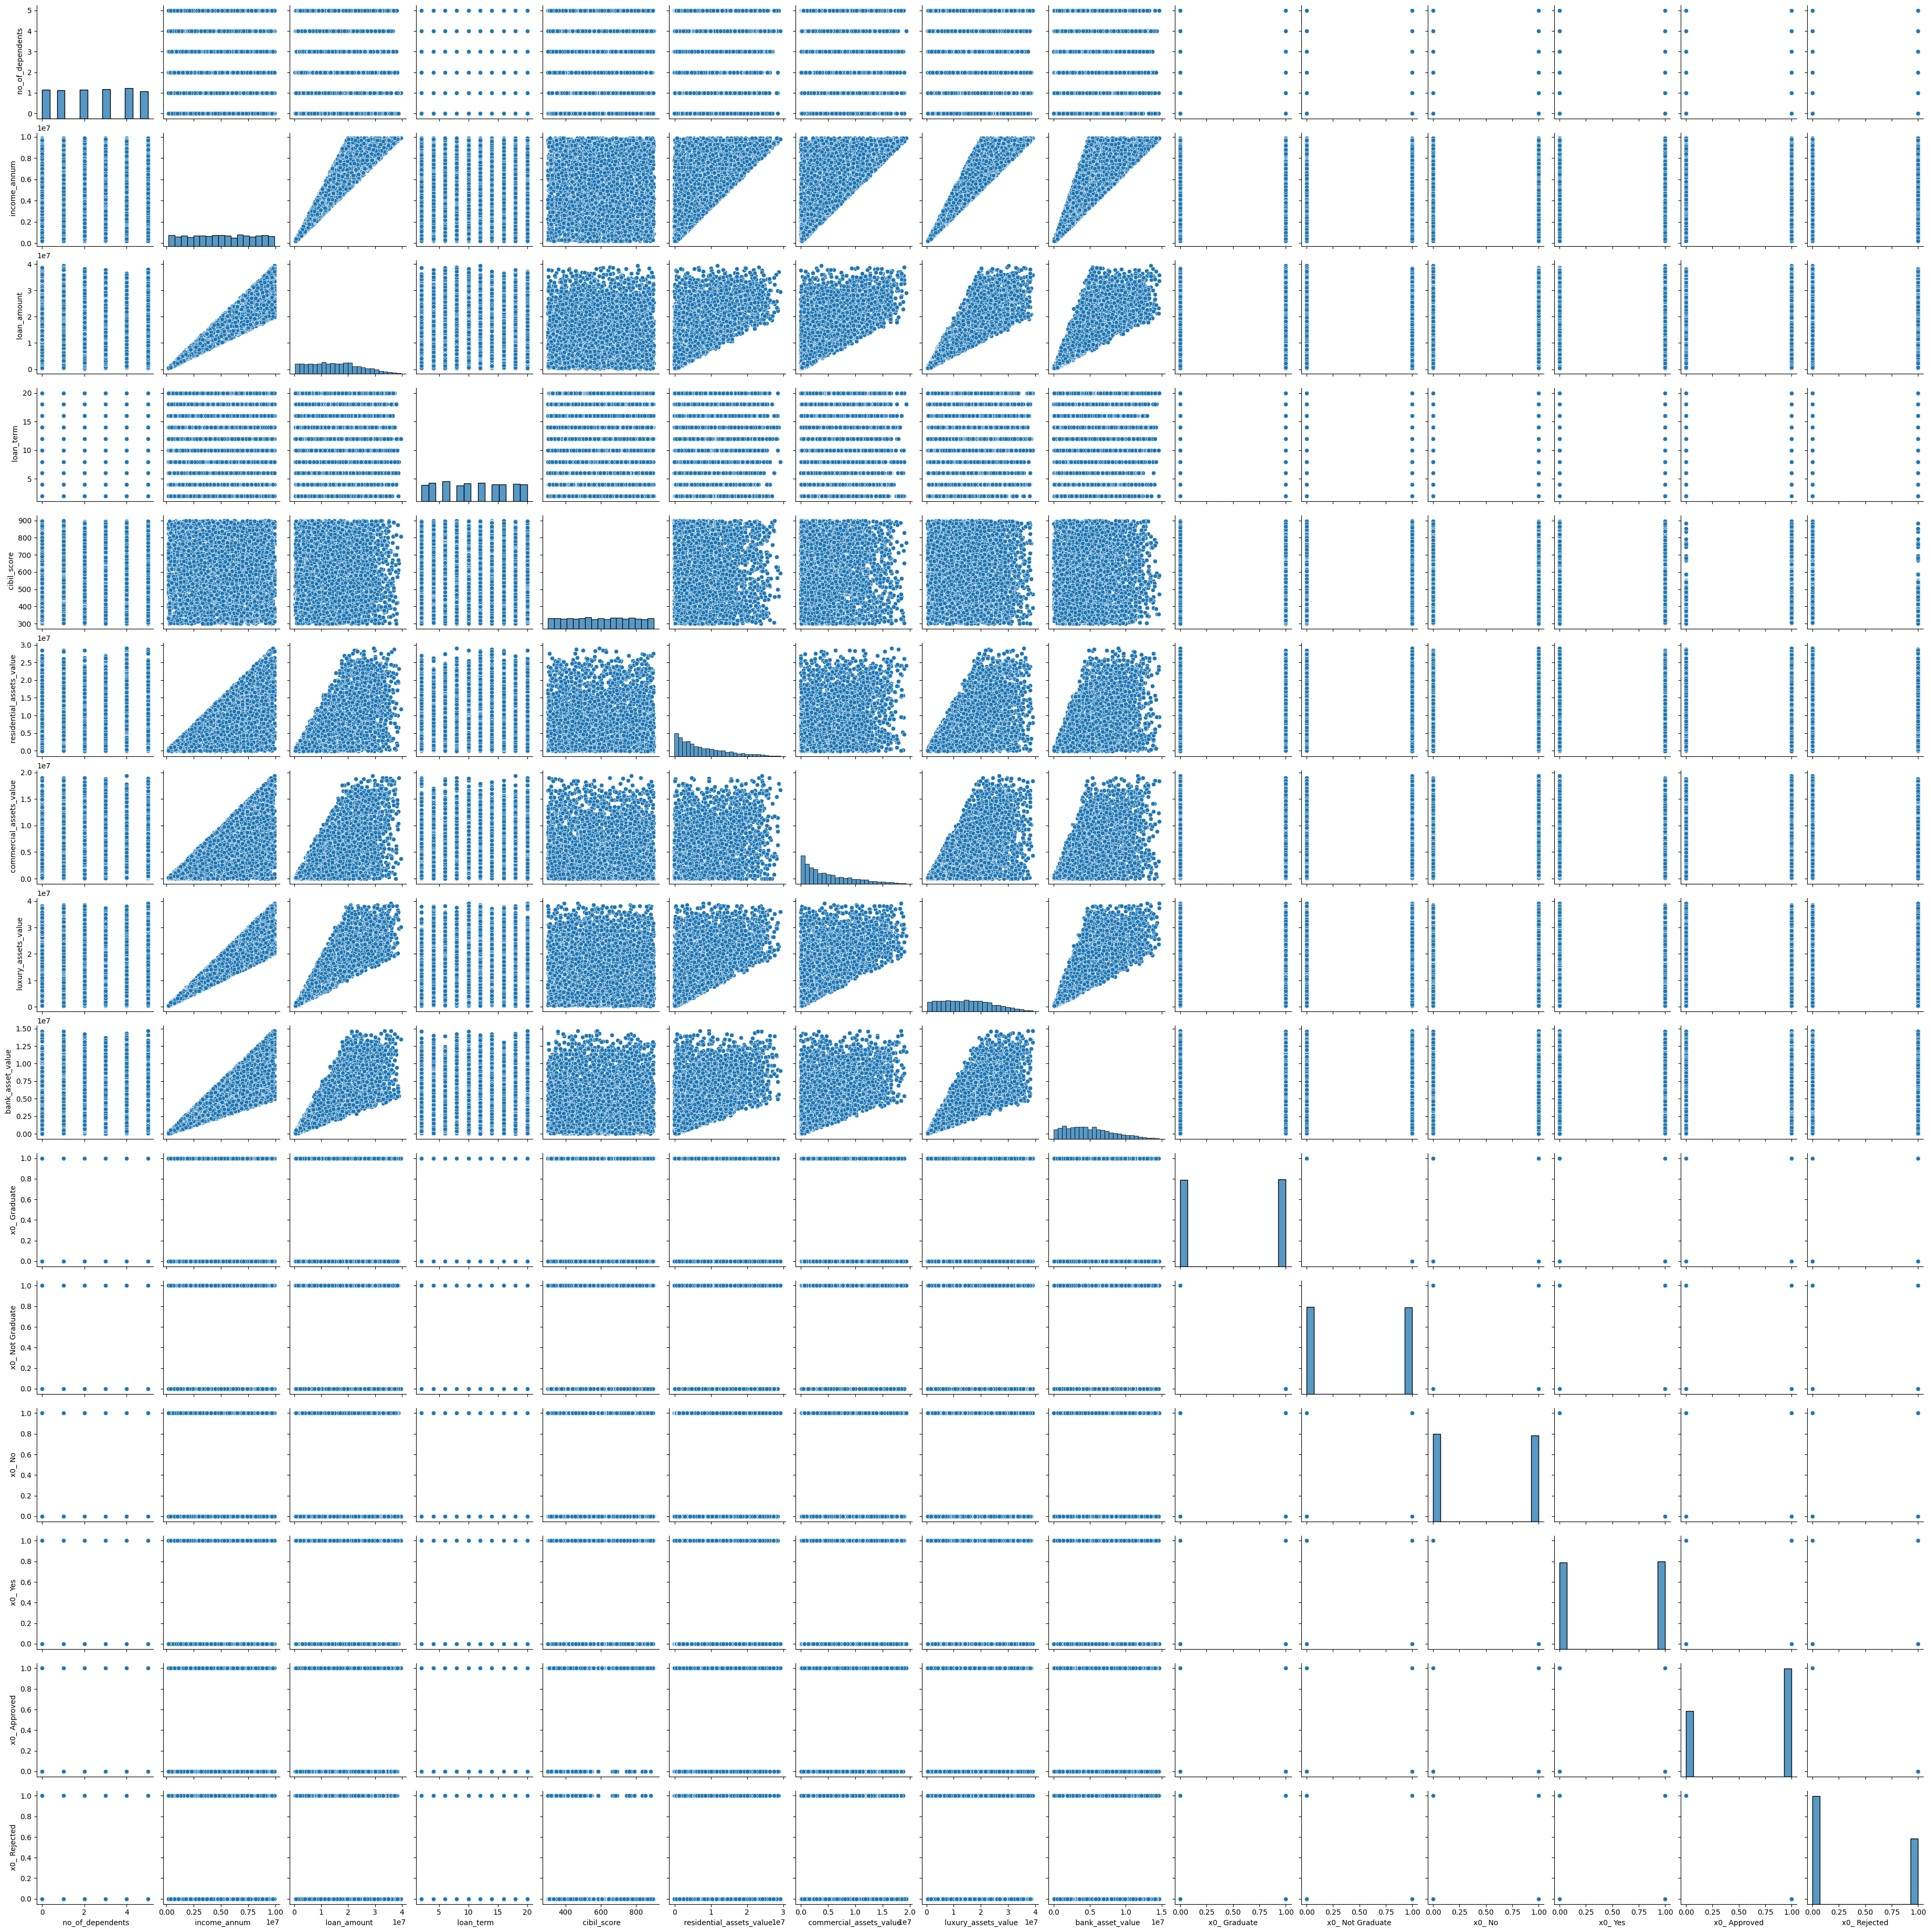

In [57]:
sns.pairplot(
    data=data
)

<Axes: ylabel=' loan_amount'>

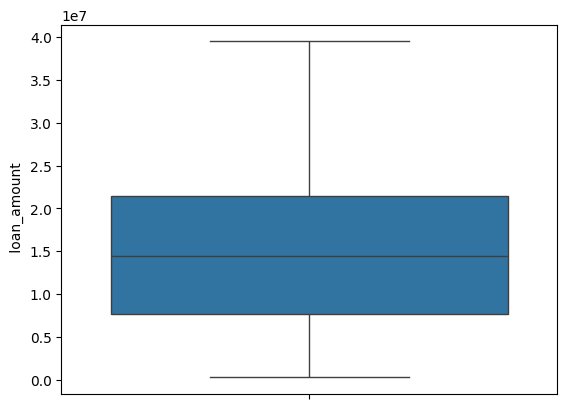

In [58]:
sns.boxplot(data=data[" loan_amount"])

In [60]:
import numpy as np
from scipy import stats

In [72]:
data = data[(np.abs(stats.zscore(data))< 2).all(axis=1)]
data.shape

(3664, 15)

<Axes: ylabel=' loan_amount'>

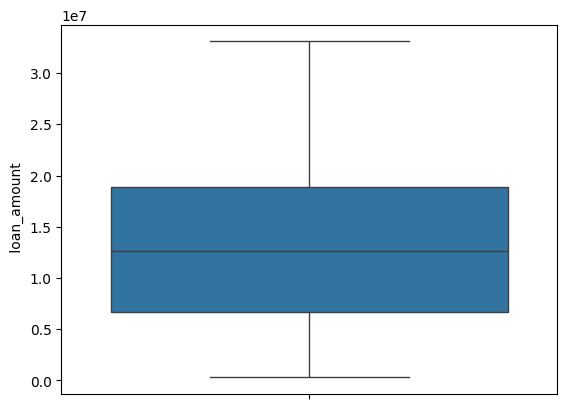

In [73]:
sns.boxplot(data=data[" loan_amount"])

In [77]:
from sklearn.preprocessing import MinMaxScaler

num_dependant_scaler = MinMaxScaler()
income_annum_scaler = MinMaxScaler()
loan_amount_scaler = MinMaxScaler()
loan_term_scaler = MinMaxScaler()
cibil_score_scaler = MinMaxScaler()
residential_assets_value_scaler = MinMaxScaler()
commercial_assets_value_scaler = MinMaxScaler()
luxury_assets_value_scaler = MinMaxScaler()
bank_asset_value_scaler = MinMaxScaler()	

data[" no_of_dependents"] = num_dependant_scaler.fit_transform(data[" no_of_dependents"].to_numpy().reshape(-1, 1))
data[" income_annum"] = income_annum_scaler.fit_transform(data[" income_annum"].to_numpy().reshape(-1, 1))
data[" loan_amount"] = loan_amount_scaler.fit_transform(data[" loan_amount"].to_numpy().reshape(-1, 1))
data[" loan_term"] = loan_term_scaler.fit_transform(data[" loan_term"].to_numpy().reshape(-1, 1))
data[" cibil_score"] = cibil_score_scaler.fit_transform(data[" cibil_score"].to_numpy().reshape(-1, 1))
data[" residential_assets_value"] = residential_assets_value_scaler.fit_transform(data[" residential_assets_value"].to_numpy().reshape(-1, 1))
data[" commercial_assets_value"] = commercial_assets_value_scaler.fit_transform(data[" commercial_assets_value"].to_numpy().reshape(-1, 1))
data[" luxury_assets_value"] = luxury_assets_value_scaler.fit_transform(data[" luxury_assets_value"].to_numpy().reshape(-1, 1))
data[" bank_asset_value"] = bank_asset_value_scaler.fit_transform(data[" bank_asset_value"].to_numpy().reshape(-1, 1))

data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,x0_ Graduate,x0_ Not Graduate,x0_ No,x0_ Yes,x0_ Approved,x0_ Rejected
1,0.0,0.402062,0.362805,0.333333,0.195000,0.136585,0.160584,0.257576,0.289474,0.0,1.0,0.0,1.0,0.0,1.0
3,0.6,0.824742,0.926829,0.333333,0.278333,0.892683,0.240876,0.696970,0.692982,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.989691,0.728659,1.000000,0.136667,0.609756,0.598540,0.881818,0.438596,0.0,1.0,0.0,1.0,0.0,1.0
5,0.0,0.474227,0.402439,0.444444,0.031667,0.336585,0.605839,0.406061,0.447368,1.0,0.0,0.0,1.0,0.0,1.0
7,0.4,0.567010,0.448171,1.000000,0.136667,0.648780,0.416058,0.348485,0.526316,1.0,0.0,0.0,1.0,0.0,1.0


In [82]:
from sklearn.model_selection import train_test_split
import torch
X = data.drop(columns=["x0_ Approved","x0_ Rejected"])
Y = data[["x0_ Approved","x0_ Rejected"]]
X_train , X_test ,Y_train, Y_test = train_test_split(torch.Tensor(X.to_numpy()),torch.Tensor(Y.to_numpy()),test_size=0.2,random_state=23)
X_train.shape

torch.Size([2931, 13])

In [79]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/49/b6/1a2e3d43d4bc4ad7a4575b3745d707a68d5ed00ba263b205b6281bdd0921/torch-2.3.1-cp312-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/44/aa/edf5205465b70cee020b711f1f4b6179a0ae369cc13aadb8f8ec6fd7d2f5/filelock-3.15.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/61/53/e18c8c97d0b2724d85c9830477e3ebea3acf1dcdc6deb344d5d9c93a9946/sympy-1.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/netw

In [90]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(13, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
model= NeuralNetwork()
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=512, out_features=2, bias=True)
  )
)

In [91]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = torch.nn.CrossEntropyLoss()

In [92]:
def train_one_epoch(epoch_index, training_data):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_data):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [93]:
from datetime import datetime


# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
epoch_number = 0

EPOCHS = 20

history = []

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, zip(X_train, Y_train))


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(zip(X_test, Y_test)):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    history.append({"epoch": epoch + 1, "loss": avg_loss, "type": "training"})
    history.append({"epoch": epoch + 1, "loss": avg_vloss.item(), "type": "validation"})

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'models/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 0.6244689408130943
  batch 2000 loss: 0.40913594847605417
LOSS train 0.40913594847605417 valid 0.2581288516521454
EPOCH 2:
  batch 1000 loss: 0.33954927044360966
  batch 2000 loss: 0.2543495078636322
LOSS train 0.2543495078636322 valid 0.2215784192085266
EPOCH 3:
  batch 1000 loss: 0.2895520110417559
  batch 2000 loss: 0.22351845760936653
LOSS train 0.22351845760936653 valid 0.21261940896511078
EPOCH 4:
  batch 1000 loss: 0.2800252474527839
  batch 2000 loss: 0.20385321030024117
LOSS train 0.20385321030024117 valid 0.19107095897197723
EPOCH 5:
  batch 1000 loss: 0.25807163822198603
  batch 2000 loss: 0.18693610577874362
LOSS train 0.18693610577874362 valid 0.202710822224617
EPOCH 6:
  batch 1000 loss: 0.2625302564664441
  batch 2000 loss: 0.18079533370827916
LOSS train 0.18079533370827916 valid 0.18654514849185944
EPOCH 7:
  batch 1000 loss: 0.24040162219339342
  batch 2000 loss: 0.18863772295915654
LOSS train 0.18863772295915654 valid 0.1704653799533844
EPO

<Axes: xlabel='epoch', ylabel='loss'>

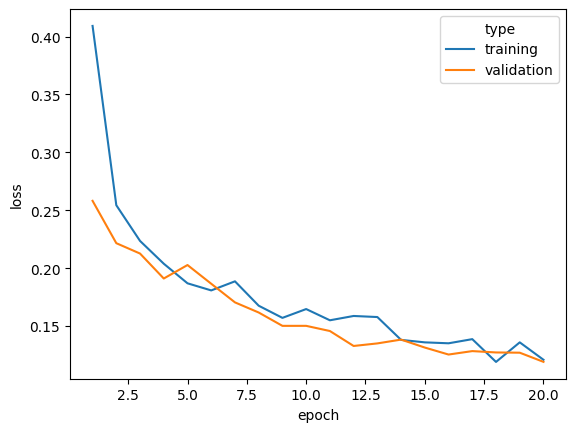

In [94]:
history_df = pd.DataFrame.from_records(history)
sns.lineplot(data=history_df, x="epoch", y="loss", hue="type")


In [95]:
import pickle

with open("education_ohe.pickle", "wb") as f:
    p = pickle.Pickler(f)
    p.dump(education_ohe)

with open("self_employed_ohe.pickle", "wb") as f:
    p = pickle.Pickler(f)
    p.dump(self_employed_ohe)


